(0,)


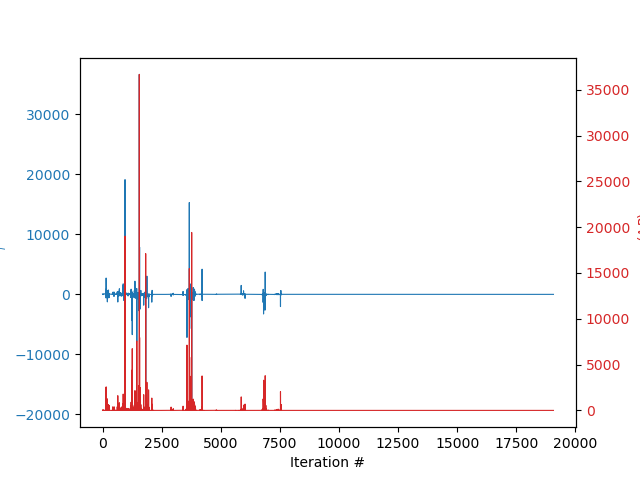

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qcnico.plt_utils import get_cm

%matplotlib widget

nn = 64

istart = 0
nocc_init = 50

Pt1d = np.load(f'1d/Pt-{nn}.npy')
conv1d = np.load(f'1d/conv-{nn}.npy')
# Pt2d = np.load(f'2d/Pt-{nn}.npy')
# Pt3d = np.load(f'3d/Pt-{nn}.npy')

restart_inds = (Pt1d.sum(1) == nocc_init).nonzero()[0]
print(restart_inds.shape)

fig, ax = plt.subplots()
color1='tab:blue'
ax.plot(Pt1d[istart:].sum(1), lw=0.8,color=color1)
ax.set_ylabel('$\sum_{i} P_i$', color=color1)
ax.set_xlabel('Iteration #')
ax.tick_params(axis='y', labelcolor=color1)

ax2 = ax.twinx()
color2 = 'tab:red'
ax2.plot(conv1d[istart:,0],lw=0.8,color=color2)
ax2.set_ylabel('max($\Delta P$)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# ax.plot(Pt3d[istart:].sum(1),lw=0.8,label='3D')

# plt.legend()
plt.show()

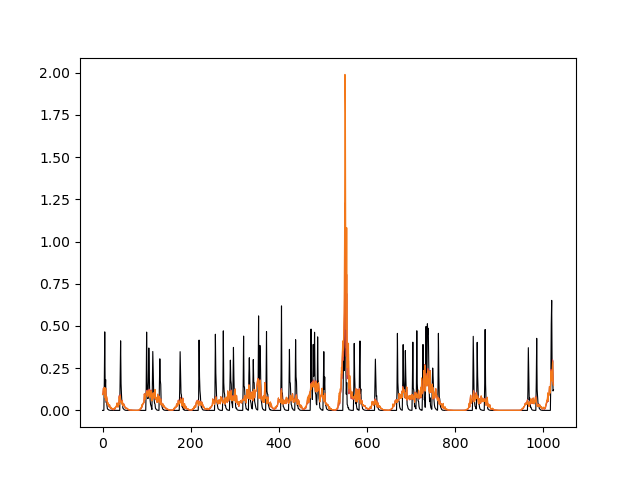

In [3]:
fig, ax = plt.subplots()

plt_inds = np.arange(0,20)

clrs = get_cm(plt_inds, 'inferno')

for n in plt_inds[[0,-5,-3,-1]]:
    ax.plot(Pt1d[n,:],c=clrs[n],lw=0.8)

Seed: 0 --> final \sum_i p_i =  -7.626891448464902
Seed: 42 --> final \sum_i p_i =  2.7600217486706056
Seed: 64 --> final \sum_i p_i =  4.61154191482639
Seed: 78 --> final \sum_i p_i =  3.192290279516742


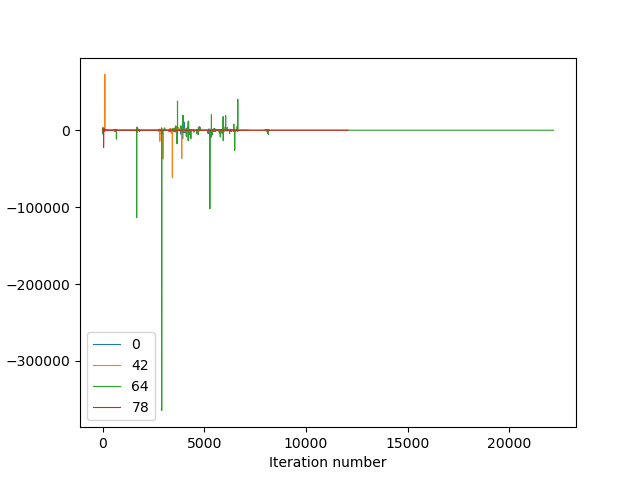

In [10]:
random_seeds = [0,42,64,78]

fig, ax = plt.subplots()

for r in random_seeds:
    pt_sum = np.vstack((np.load(f'2d/Pinits-{r}.npy'),np.load(f'2d/Pt-{r}.npy'))).sum(1)
    ax.plot(pt_sum,lw=0.8,label=str(r))
    print(f'Seed: {r} --> final \sum_i p_i = ', pt_sum[-1])
ax.set_xlabel('Iteration number')
ax.set_ylabel('Sum of occupation probabilities')
plt.legend()
plt.show()
